<center>
    <img src="https://ecfm.usac.edu.gt/sites/default/files/2019-02/cintillo.png" width="1000" alt="ecfm logo">
</center>

# Proyecto: Modelo de Ising
Autor: Nicolás Esteban Poyón Castro

Curso: Física Computacional

## Objetivos

* Estudiar la evolución de la energía y la magnetización para distintos valores de temperatura con el uso del algoritmo de Metropolis.
* Calcular el calor específico y la susceptibilidad del sistema.
* Determinar la temperatura crítica.
* Observar el comportamiento del calor específico y la magnetización en temperaturas cercanas a la temperatura crítica.

# Parte 1: Algoritmo de Metrópolis

In [ ]:
# Importando librerías
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.random import rand

In [ ]:
# Función para asignar el espín
def spin(x):
  if x < 0.5:
    return 1
  else:
    return -1

In [ ]:
# Red de espines en 2 dimensiones con espines aleatorios
def estadoInicial(L):
    red = np.zeros((L,L))
    for i in range(L):
      for j in range(L):
        red[i,j] = spin(random.random())
    return red

In [ ]:
# Red de 2 dimensiones con todos los espines igual a 1
def estadoFrio(L):
    red = np.zeros((L,L))
    for i in range(L):
      for j in range(L):
        red[i,j] = 1
    return red

## 1.1 Funciones para calcular la energía E y la magnetización M del modelo de Ising para una configuración ϕ.

In [ ]:
# Función para calcular la energía
def energia(conf, J, H):
  E_0 = 0
  for i in range(len(conf)):
    for j in range(len(conf)):
      E_0 += -(J/2)*conf[i,j]*(conf[(i+1)%len(conf),j] + conf[i,(j+1)%len(conf)]+conf[(i-1)%len(conf),j]+conf[i,(j-1)%len(conf)]) - H*conf[i,j]
  return E_0/(len(conf)**2)

In [ ]:
# Función para calcular la magnetización
def magnetizacion(conf):
  m = 0
  for i in range(len(conf)):
    for j in range(len(conf)):
      m += conf[i,j]
  return m/(len(conf)**2)

In [ ]:
# Función para calcular la energía del sistema
def energiared(conf, J, H):
  E_0 = 0
  for i in range(len(conf)):
    for j in range(len(conf)):
      E_0 += -(J/2)*conf[i,j]*(conf[(i+1)%len(conf),j] + conf[i,(j+1)%len(conf)]+conf[(i-1)%len(conf),j]+conf[i,(j-1)%len(conf)]) - H*conf[i,j]
  return E_0

In [ ]:
# Función para calcular la magnetización del sistema
def magnetizacionred(conf):
  m = 0
  for i in range(len(conf)):
    for j in range(len(conf)):
      m += conf[i,j]
  return m

## 1.2 Implementación del algoritmo de Metrópolis

In [ ]:
# Algoritmo de Metrópolis
def algoritmoMetropolis(conf, beta, J, H):
    for i in range(len(conf)):
        a = np.random.randint(0, len(conf))
        b = np.random.randint(0, len(conf))
        s =  conf[a, b]
        delta_E = 2*J*s*(conf[(a+1)%len(conf),b] + conf[a,(b+1)%len(conf)]+conf[(a-1)%len(conf),b]+conf[a,(b-1)%len(conf)]) + 2*H*s
        if delta_E <= 0 or rand() < np.exp(-beta*delta_E):
          conf[a, b] = -s
    return conf

## 1.3 Evolución de la energía y la magnetización para distintos valores de temperatura

In [ ]:
# Implementación del algoritmo de Metrópolis para estudiar la evolución de la energía y la magnetización

# Arranque en caliente
T = [0.1, 3, 100]
iteraciones = 2**13
Ec = []
Mc = []
for i in range(len(T)):
    beta = 1/T[i]
    Ene = 0
    Mag = 0
    for j in range(iteraciones):
        conf = algoritmoMetropolis(estadoInicial(10), beta, 1, 0)
        Ene += energia(conf,1,0)
        Mag += magnetizacion(conf)
        Ec.append(Ene/iteraciones)
        Mc.append(Mag/iteraciones)

  # Implementación del algoritmo de Metrópolis para estudiar la evolución de la energía y la magnetización

# Arranque en frío
Ef = []
Mf = []
for i in range(len(T)):
    beta = 1/T[i]
    Ene = 0
    Mag = 0
    for j in range(iteraciones):
        conf = algoritmoMetropolis(estadoFrio(10), beta, 1, 0)
        Ene += energia(conf,1,0)
        Mag += magnetizacion(conf)
        Ef.append(Ene/iteraciones)
        Mf.append(Mag/iteraciones)

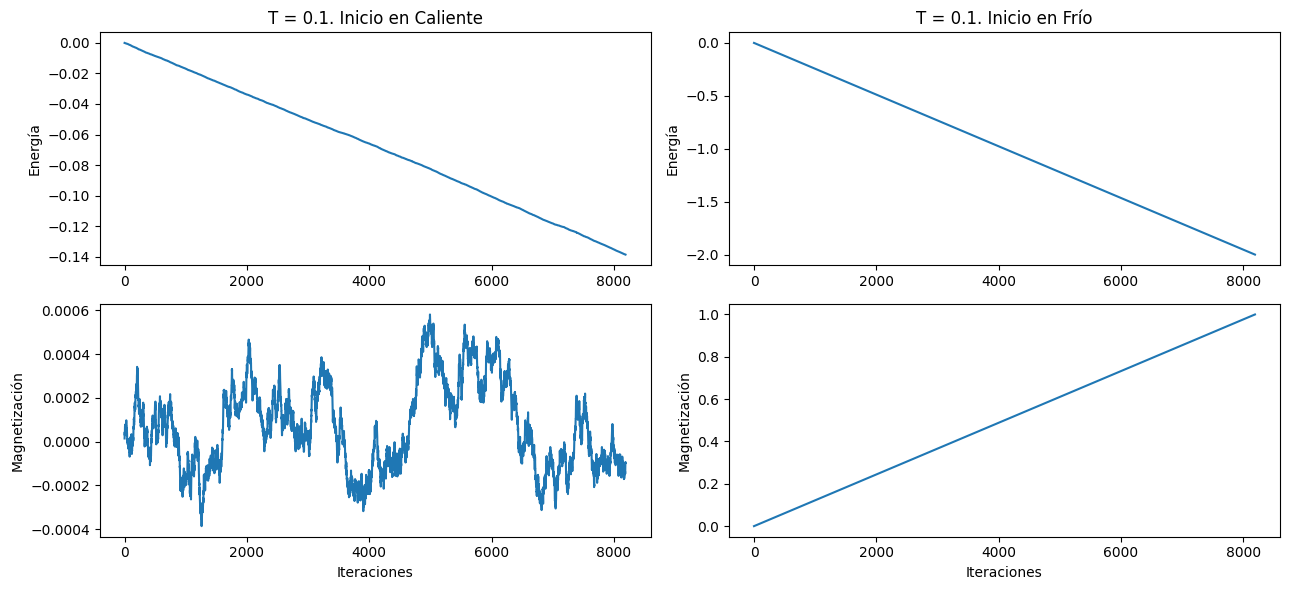

In [ ]:
# Gráfica de la evolución de la energía y la magnetización en el tiempo para T = 0.1.
# Se muestran las gráficas tanto para un arranque en frío como para uno en caliente
plt.figure(figsize=(13, 6))
plt.subplot(2, 2, 1)
plt.plot(Ec[0:iteraciones-1])
plt.title("T = 0.1. Inicio en Caliente")
plt.ylabel("Energía")
plt.subplot(2, 2, 3)
plt.plot(Mc[0:iteraciones-1])
plt.xlabel("Iteraciones")
plt.ylabel("Magnetización")
plt.subplot(2, 2, 2)
plt.plot(Ef[0:iteraciones-1])
plt.title("T = 0.1. Inicio en Frío")
plt.ylabel("Energía")
plt.subplot(2, 2, 4)
plt.plot(Mf[0:iteraciones-1])
plt.xlabel("Iteraciones")
plt.ylabel("Magnetización")
plt.tight_layout()
plt.show()

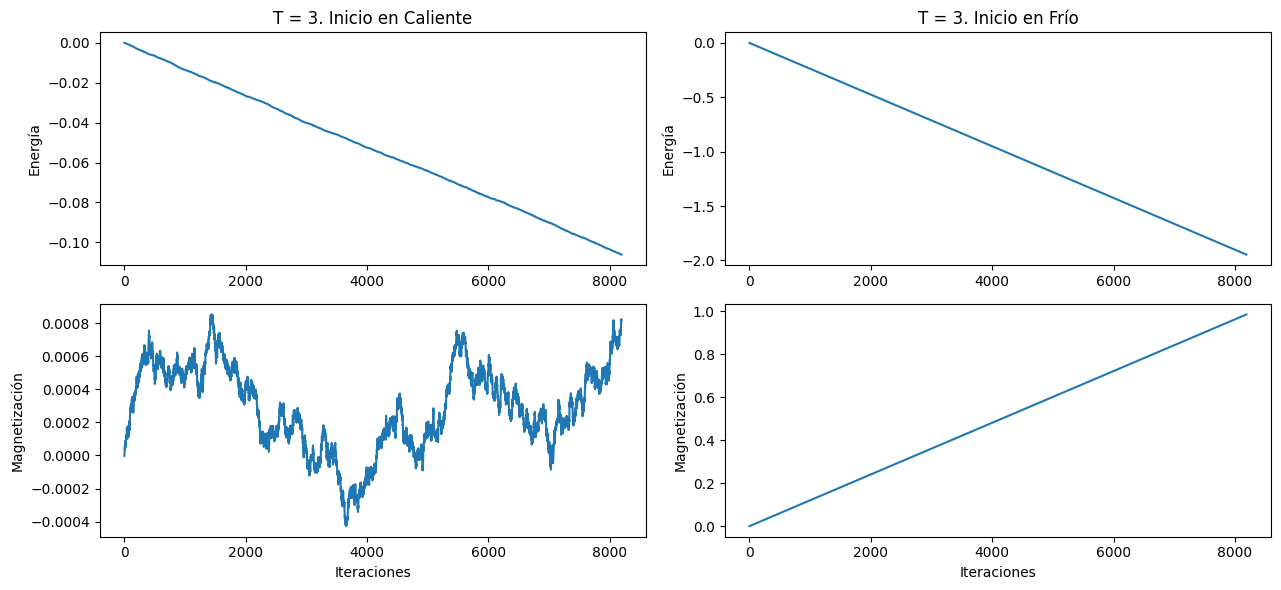

In [ ]:
# Gráfica de la evolución de la energía y la magnetización en el tiempo para T = 3.
# Se muestran las gráficas tanto para un arranque en frío como para uno en caliente
plt.figure(figsize=(13, 6))
plt.subplot(2, 2, 1)
plt.plot(Ec[iteraciones:2*iteraciones-1])
plt.title("T = 3. Inicio en Caliente")
plt.ylabel("Energía")
plt.subplot(2, 2, 3)
plt.plot(Mc[iteraciones:2*iteraciones-1])
plt.xlabel("Iteraciones")
plt.ylabel("Magnetización")
plt.subplot(2, 2, 2)
plt.plot(Ef[iteraciones:2*iteraciones-1])
plt.title("T = 3. Inicio en Frío")
plt.ylabel("Energía")
plt.subplot(2, 2, 4)
plt.plot(Mf[iteraciones:2*iteraciones-1])
plt.xlabel("Iteraciones")
plt.ylabel("Magnetización")
plt.tight_layout()
plt.show()

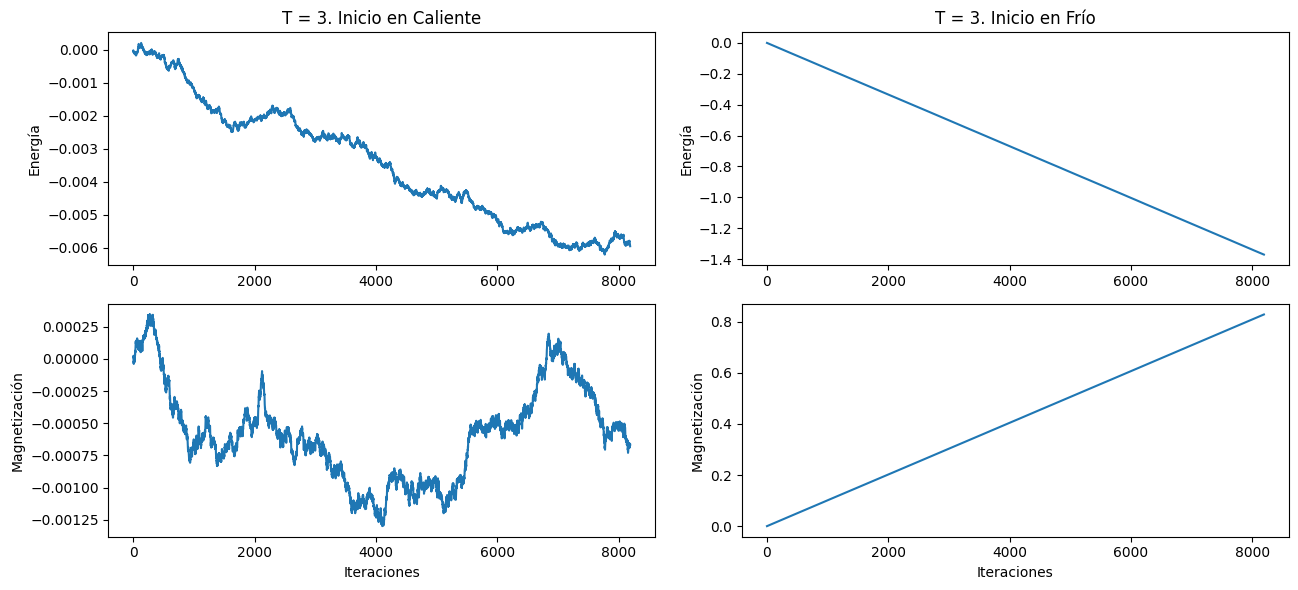

In [ ]:
# Gráfica de la evolución de la energía y la magnetización en el tiempo para T = 100.
# Se muestran las gráficas tanto para un arranque en frío como para uno en caliente
plt.figure(figsize=(13, 6))
plt.subplot(2, 2, 1)
plt.plot(Ec[2*iteraciones:3*iteraciones-1])
plt.title("T = 3. Inicio en Caliente")
plt.ylabel("Energía")
plt.subplot(2, 2, 3)
plt.plot(Mc[2*iteraciones:3*iteraciones-1])
plt.xlabel("Iteraciones")
plt.ylabel("Magnetización")
plt.subplot(2, 2, 2)
plt.plot(Ef[2*iteraciones:3*iteraciones-1])
plt.title("T = 3. Inicio en Frío")
plt.ylabel("Energía")
plt.subplot(2, 2, 4)
plt.plot(Mf[2*iteraciones:3*iteraciones-1])
plt.xlabel("Iteraciones")
plt.ylabel("Magnetización")
plt.tight_layout()
plt.show()

## 1.4 Calculo del calor específico y la susceptibilidad del sistema y determinación de la temperatura crítica

In [ ]:
# Implementación del algoritmo de Metropolis para estudiar la energía, magnetización
# susceptibilidad magnética y capacidad calorífica en función de la temperatura
T  = np.linspace(1, 10, 50)
iteraciones = 2**13
E = []
M = []
C = []
X = []
for i in range(len(T)):
    conf = estadoInicial(10)
    beta = 1/T[i]
    E0 = M0 = E2 = M2 = 0
    for k in range(2**10):
      conf = algoritmoMetropolis(conf, beta, 1, 0)
    for j in range(iteraciones):
      conf = algoritmoMetropolis(conf, beta, 1, 0)
      Ene = energia(conf,1,0)
      Mag = magnetizacion(conf)
      E0 += Ene
      M0 += Mag
      E2 += Ene**2
      M2 += Mag**2
    C.append((E2/iteraciones - (E0/iteraciones)**2)*(beta/T[i]))
    X.append((M2/iteraciones - (M0/iteraciones)**2)*beta)
    E.append(E0/iteraciones)
    M.append(M0/iteraciones)

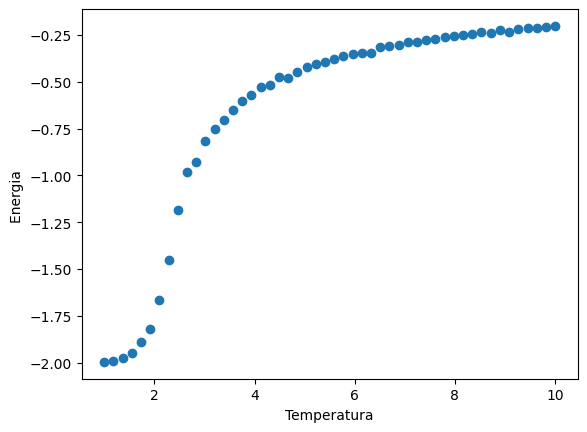

In [ ]:
# Gráfica de energía versus temperatura
plt.plot(T, E, 'o')
plt.xlabel("Temperatura")
plt.ylabel("Energia ")
plt.show()

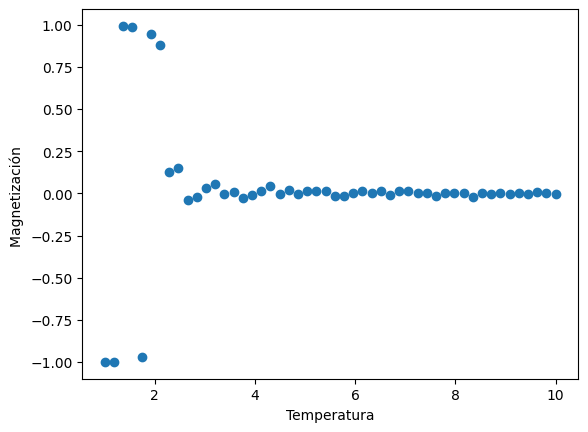

In [ ]:
# Gráfica de magnetización versus temperatura
plt.plot(T, M, 'o')
plt.xlabel("Temperatura")
plt.ylabel("Magnetización ")
plt.show()

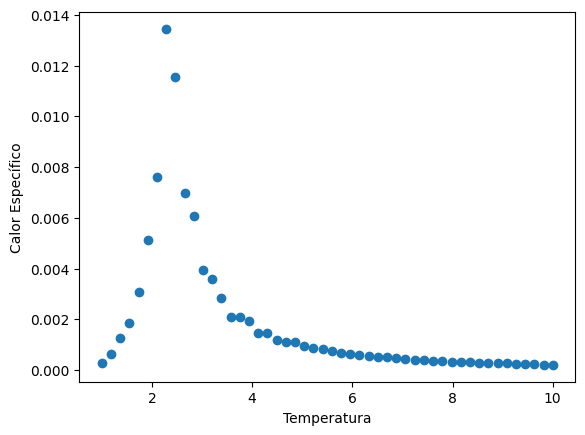

In [ ]:
# Gráfica del calor específico versus temperatura
plt.plot(T, C, 'o')
plt.xlabel("Temperatura")
plt.ylabel("Calor Específico")
plt.show()

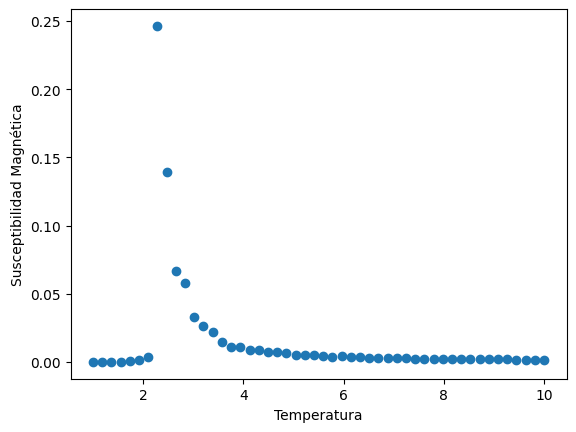

In [ ]:
# Gráfica de la susceptibilidad magnética versus temperatura
plt.plot(T, X, 'o')
plt.xlabel("Temperatura")
plt.ylabel("Susceptibilidad Magnética")
plt.show()

In [ ]:
# Obteniendo el valor de temperatura crítica.
# Para esto se encuentra la temperatura en el cual se alcanza el valor maximo de la susceptibilidad y del calor específico
a = max(X)
for i in range(len(X)):
  if X[i] == a:
    Tc = T[i]
print("Temperatura crítica encontrada a partir de la susceptibilidad: ", Tc)

b = max(C)
for i in range(len(C)):
  if C[i] == b:
    Tc = T[i]
print("Temperatura crítica encontrada a partir del calor específico: ", Tc)

Temperatura crítica:  2.2857142857142856
Temperatura crítica:  2.2857142857142856


# Parte 2: Transición de fase ferromagnética

## 2.1 Comportamiento del calor específico en la temperatura crítica

Cálculo de Cv máximo para L = 10, 11, ..., 30

In [ ]:
# Temperatura crítica teórica
Tc = 2/np.log(1+np.sqrt(2))
# Rangos de temperatura para el analisis de la magnetización cerca de la temperatura crítica
T = []
for i in range(-50,51,5):
  T.append(Tc-0.01*i)

# Implimentación del algoritmo de Metrópolis para el calculo del calor específico
C = []
iteraciones = 2**13
for i in range(len(T)):
    conf = estadoInicial(10) # Aca se va cambiando el valor de L
    beta = 1/T[i]
    E0 = E2 = 0
    for k in range(2**10):
      conf = algoritmoMetropolis(conf, beta, 1, 0)
    for j in range(iteraciones):
      conf = algoritmoMetropolis(conf, beta, 1, 0)
      Ene = energiared(conf,1,0)
      E0 += Ene
      E2 += Ene**2
    C.append((E2/iteraciones - (E0/iteraciones)**2)*(beta/T[i]))

print(max(C))

134.70137285974369


Valores de calor especifico del sistema encontrados

L = 10: C$_v$ = 134.70137285974369$\quad$$\quad$$\quad$L = 11: C$_v$ = 169.29050871209594

L = 12: C$_v$ = 197.43429950994656$\quad$$\quad$$\quad$L = 13: C$_v$ = 227.81586628229445

L = 14: C$_v$ = 282.99914317054686$\quad$$\quad$$\quad$L = 15: C$_v$ = 372.8151758156231

L = 16: C$_v$ = 451.31414228333466$\quad$$\quad$$\quad$L = 17: C$_v$ = 542.7006036337949

L = 18: C$_v$ = 700.0310352365846 $\quad$ $\quad$$\quad$L = 19: C$_v$ = 686.8529119420219

L = 20: C$_v$ = 1300.079397365879 $\quad$ $\quad$$\quad$L = 21: C$_v$ = 1272.2538692998148

L = 22: C$_v$ = 1201.8959000485663$\quad$$\quad$$\quad$L = 23: C$_v$ = 1840.2092848189925

L = 24: C$_v$ = 1775.8609820037932$\quad$$\quad$$\quad$L = 25: C$_v$ = 1797.469595015013

L = 26: C$_v$ = 2800.1089781832447$\quad$$\quad$$\quad$L = 27: C$_v$ = 2274.1413310940907

L = 28: C$_v$ = 3107.268713885678 $\quad$$\quad$$\quad$   L = 29: C$_v$ = 2874.3657104066533

L = 30: C$_v$ = 2666.9593830609706

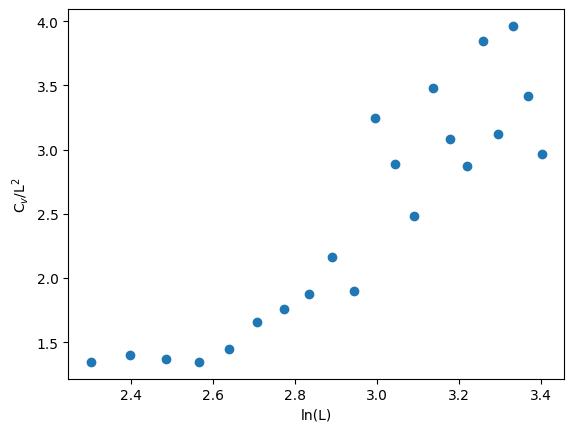

In [ ]:
# Se grafican Cv/L^2 vs ln(L) con los valores de Cv máximos calculados
cv = [134.70137285974369, 169.29050871209594, 197.43429950994656, 227.81586628229445, 282.99914317054686,\
      372.8151758156231, 451.31414228333466,  542.7006036337949, 700.0310352365846, 686.8529119420219,\
      1300.079397365879, 1272.2538692998148, 1201.8959000485663, 1840.2092848189925, 1775.8609820037932,\
      1797.469595015013, 2600.1089781832447, 2274.1413310940907, 3107.268713885678, 2874.3657104066533,\
      2666.9593830609706]

cvl = []
for i in range(len(cv)):
  cvl.append(cv[i]/(10+i)**2)

lnl = []
for i in range(len(cvl)):
  lnl.append(np.log(10+i))

plt.plot(lnl, cvl, 'o')
plt.xlabel("ln(L)")
plt.ylabel("C$_v$/L$^2$")
plt.show()

## 2.2 Magnetización cerca (pero por debajo) de la temperatura crítica

Implementación del algoritmo de Metropolis para calcular la magnetización cerca de la temperatura crítica

In [ ]:
# Temperatura crítica teórica
Tc = 2/np.log(1+np.sqrt(2))
# Rangos de temperatura para el analisis de la magnetización cerca de la temperatura crítica
deltaT = []
T = []
for i in range(0,500,10):
  T.append(Tc - 0.001*i)
for i in range(0,500,10):
  deltaT.append(0.001*i)

# Implimentación del algoritmo de Metrópolis para obtener la magnetización cerca de la temperatura crítica
# Se hace 5 veces debido a la aleatoriedad de los datos obtenidos
M = np.zeros(len(T))
iteraciones = 2**13
for a in range(5):
    for i in range(len(T)):
        conf = estadoInicial(10)
        beta = 1/T[i]
        M0 = 0
        for j in range(2**9):
          conf = algoritmoMetropolis(conf, beta, 1, 0)
        for k in range(iteraciones):
          conf = algoritmoMetropolis(conf, beta, 1, 0)
          Mag = magnetizacionred(conf)
          M0 += abs(Mag)
        M[i] += M0/iteraciones

Gráfica de la magnetización vs temperatura, cerca de la temperatura crítica.

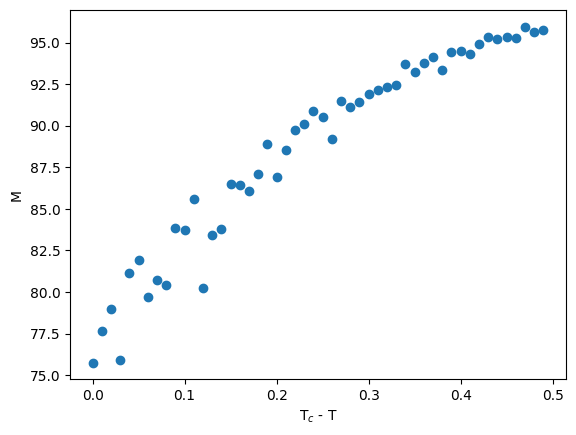

In [ ]:
plt.plot(deltaT, M/5, 'o')
plt.xlabel("T$_c$ - T")
plt.ylabel("M")
plt.show()

Linealización de los datos obtenidos. Con esta linealización se obtiene el valor de γ.

El valor de γ es:  0.06978718649737621


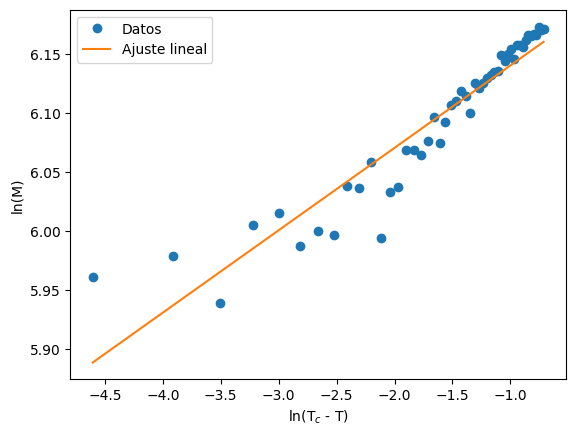

In [ ]:
from scipy import stats
delta = np.array(deltaT[1:])
magn = abs(np.array(M[1:]))

# El valor de la pendiente al realizar la linealización será nuestro valor de γ
gamma, intercept, r_value, p_value, std_err = stats.linregress(np.log(delta), np.log(magn))
print ("El valor de γ es: ", gamma)

plt.plot(np.log(delta), np.log(magn), 'o', np.log(delta), intercept + gamma*np.log(delta))
plt.legend(['Datos', 'Ajuste lineal'])
plt.xlabel("ln(T$_c$ - T)")
plt.ylabel("ln(M)")
plt.show()

Comparación del ajuste calculado con los datos obtenidos por medio del algoritmo de Metrópolis.

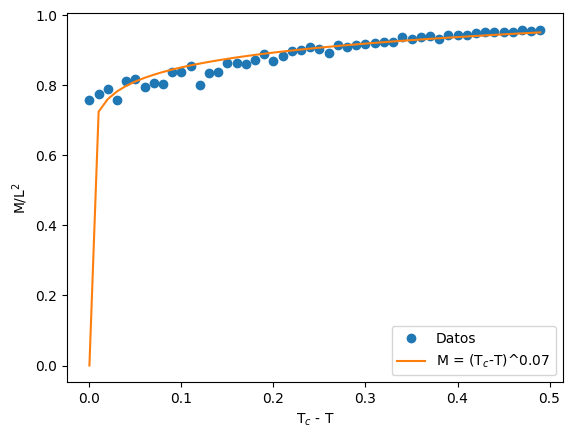

In [ ]:
# Gráfica de ln(T_c - T) vs M/L^2
plt.plot(deltaT, M/500, 'o', deltaT,deltaT**gamma)
plt.legend(['Datos', f'M = (T$_c$-T)^{round(gamma,3)}'])
plt.xlabel("T$_c$ - T")
plt.ylabel("M/L$^2$")
plt.show()

## 2.3 Susceptibilidad Magnética cerca de la temperatura crítica

In [ ]:
# Temperatura crítica teórica
Tc = 2/np.log(1+np.sqrt(2))
# Rangos de temperatura para el analisis de la magnetización cerca de la temperatura crítica
deltaT = []
T = []
for i in range(0,100,4):
  deltaT.append(0.1+0.005*i)
for i in range(0,100,4):
  T.append(Tc + 0.1+0.005*i)

# Implimentación del algoritmo de Metrópolis para obtener la susceptibilidad magnética cerca de la temperatura crítica
X = []
iteraciones = 2**13
for i in range(len(T)):
    conf = estadoInicial(10)
    beta = 1/T[i]
    M0 =  M2 = 0
    for j in range(2**10):
      conf = algoritmoMetropolis(conf, beta, 1, 0)
    for j in range(iteraciones):
      conf = algoritmoMetropolis(conf, beta, 1, 0)
      Mag = magnetizacion(conf)
      M0 += Mag
      M2 += Mag**2
    X.append((M2/iteraciones - (M0/iteraciones)**2)*beta)

Gráfica de la susceptibilidad magnética vs temperatura, cerca de la temperatura crítica.

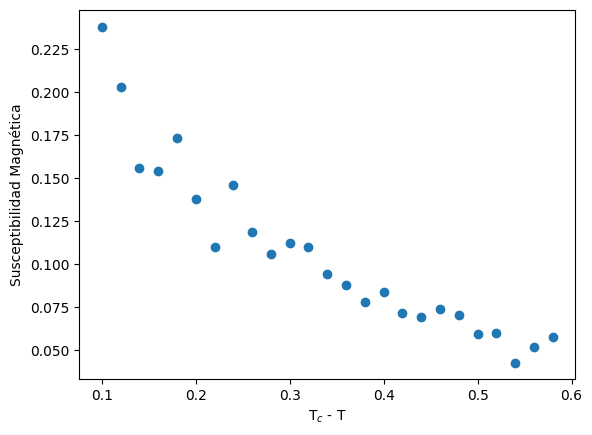

In [ ]:
plt.plot(deltaT, np.array(X), 'o')
plt.xlabel("T$_c$ - T")
plt.ylabel("Susceptibilidad Magnética")
plt.show()

Linealización de los datos obtenidos. Con esta linealización se obtiene el valor de ϵ.

El valor de β es:  -0.8570535757723712


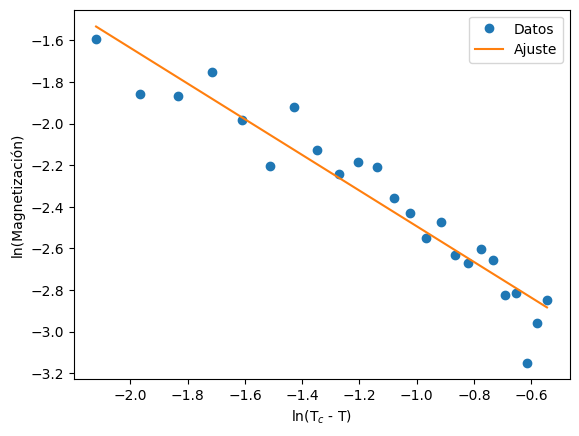

In [ ]:
delta = np.array(deltaT[1:])
susc = abs(np.array(X[1:]))

epsilon, intercept, r_value, p_value, std_err = stats.linregress(np.log(delta), np.log(susc))
print ("El valor de ϵ es: ", epsilon)

plt.plot(np.log(delta), np.log(susc), 'o', np.log(delta), intercept + epsilon*np.log(delta))
plt.legend(['Datos', 'Ajuste'])
plt.xlabel("ln(T$_c$ - T)")
plt.ylabel("ln(Magnetización)")
plt.show()